In [3]:
# Importing the first couple necessary libraries

# import the important packages
import pandas as pd  # library used for data manipulation and analysis

import numpy as np  # library used for working with arrays

import matplotlib.pyplot as plt  # library for visualization

import seaborn as sns  # library for visualization

%matplotlib inline

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.datasets import make_moons
from scipy.spatial.distance import pdist, squareform
from scipy.sparse.linalg import eigsh
from scipy.sparse.csgraph import laplacian
import networkx as nx
from sklearn.cluster import SpectralClustering, KMeans


from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import plotly.express as px  # for interative visualizations

# Clustering and Dimensionality Reduction

In [49]:
data = pd.read_csv('/Users/anjali/Desktop/wine.csv')

In [51]:
wine_df = data.copy()
wine_df.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

## PCA

In [54]:
# Selecting the 11 chemical properties for PCA
chemical_properties = wine_df[['fixed.acidity', 'volatile.acidity', 'citric.acid', 
    'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
    'total.sulfur.dioxide', 'density', 'pH', 'sulphates',
    'alcohol'
]]

In [56]:
# Standardizing the data
scaler = StandardScaler()

# Fitting and transforming the data
wine_scaled_data = scaler.fit_transform(chemical_properties)

wine_scaled_data.shape

(6497, 11)

In [58]:
# Perform PCA to reduce dimensionality 
#pca = PCA()
#wine_pca = pca.fit_transform(wine_scaled_data)
#wine_pca.shape

pca = PCA(n_components = 11)
wine_pca = pca.fit_transform(wine_scaled_data)
wine_pca.shape

(6497, 11)

In [60]:
# Explaining the variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[0.2754426  0.22671146 0.14148609 0.08823201 0.06544317 0.05521016
 0.04755989 0.04559184 0.03063855 0.02069961 0.00298462]


In [62]:
# Creating a dataframe with the explained variance and cumulative explained variance
pca_table = pd.DataFrame({
    'Principal Component': range(1, len(explained_variance) + 1),
    'Explained Variance Ratio': explained_variance,
    'Cumulative Explained Variance':  explained_variance.cumsum()
})


print(pca_table)

    Principal Component  Explained Variance Ratio  \
0                     1                  0.275443   
1                     2                  0.226711   
2                     3                  0.141486   
3                     4                  0.088232   
4                     5                  0.065443   
5                     6                  0.055210   
6                     7                  0.047560   
7                     8                  0.045592   
8                     9                  0.030639   
9                    10                  0.020700   
10                   11                  0.002985   

    Cumulative Explained Variance  
0                        0.275443  
1                        0.502154  
2                        0.643640  
3                        0.731872  
4                        0.797315  
5                        0.852525  
6                        0.900085  
7                        0.945677  
8                        0.976316  
9  

In [68]:
pca_7 = PCA(n_components = 0.90)
wine_pca_7 = pca_7.fit_transform(wine_scaled_data)
wine_pca_7.shape

# Explaining the variance ratio for each principal component
explained_variance_7 = pca_7.explained_variance_ratio_

print(explained_variance_7)

[0.2754426  0.22671146 0.14148609 0.08823201 0.06544317 0.05521016
 0.04755989]


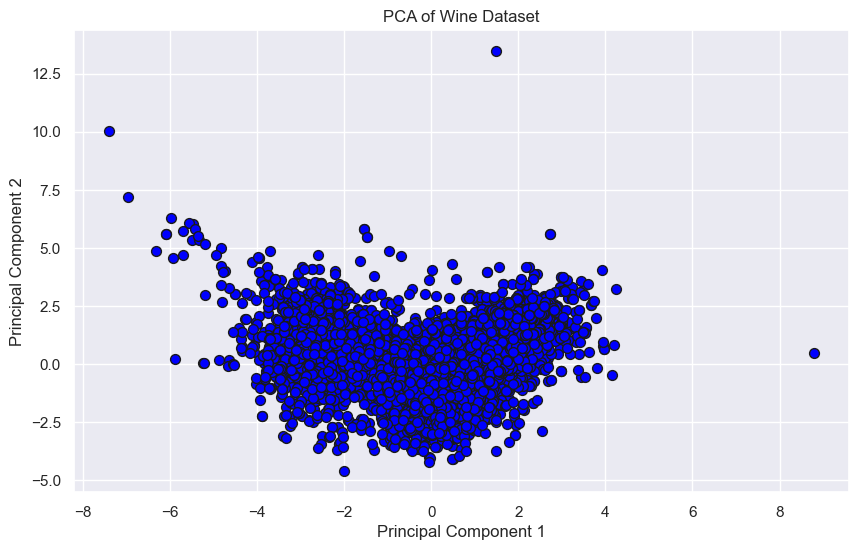

In [70]:
# Creating a scatterplot of the PCA components
plt.figure(figsize=(10, 6))
plt.scatter(wine_pca_7[:, 0], wine_pca_7[:, 1], c='blue', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.grid(True)
plt.show()

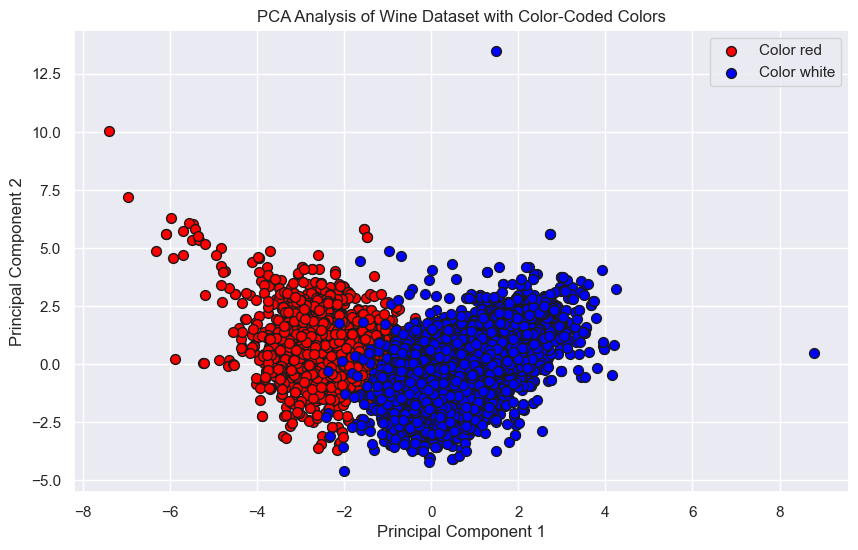

color
white    4898
red      1599
Name: count, dtype: int64


In [72]:
import matplotlib.pyplot as plt
import numpy as np

# \ 'color' is your target variable 
wine_color = wine_df['color'] 

# Color mapping for the types of wine (modify the mapping according to your actual classes)
colors = {'red': 'red', 'white': 'blue'} 

# Plotting the first two principal components with color-coded wine types
plt.figure(figsize=(10, 6))
for label in np.unique(wine_color):  
    subset = wine_pca[wine_color == label]
    plt.scatter(subset[:, 0], subset[:, 1], c=colors[label], label=f'Color {label}', edgecolor='k', s=50)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Analysis of Wine Dataset with Color-Coded Colors')
plt.legend()
plt.show()

# Print the count of each wine color
label_counts = wine_color.value_counts()
print(label_counts)

In [29]:
wine_df['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

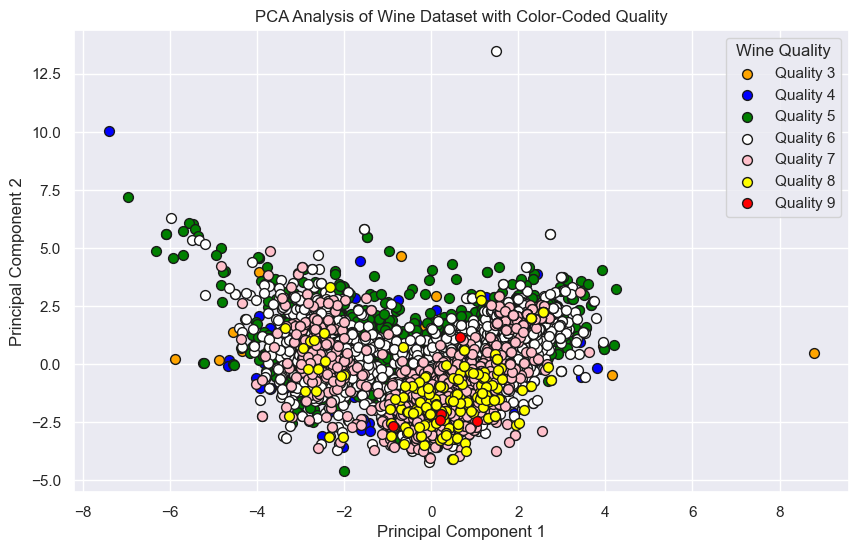

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


In [31]:
# Assuming 'quality' is your target variable
wine_quality = wine_df['quality']

# Color mapping for the qualities of wine (ensure all classes have a color)
colors = {
    5: 'green',
    6: 'white',
    7: 'pink',
    4: 'blue',
    8: 'yellow',
    3: 'orange',
    9: 'red'
}

# Plotting the first two principal components with color-coded quality of wine
plt.figure(figsize=(10, 6))
for label in np.unique(wine_quality):
    subset = wine_pca[wine_quality == label]
    plt.scatter(subset[:, 0], subset[:, 1], c=colors[label], label=f'Quality {label}', edgecolor='k', s=50)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Analysis of Wine Dataset with Color-Coded Quality')
plt.legend(title="Wine Quality")
plt.show()

# Print the count of each wine quality
label_counts = wine_quality.value_counts()
print(label_counts)

## tSNE

In [34]:
# Applying t-SNE on the PCA results
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(wine_pca)

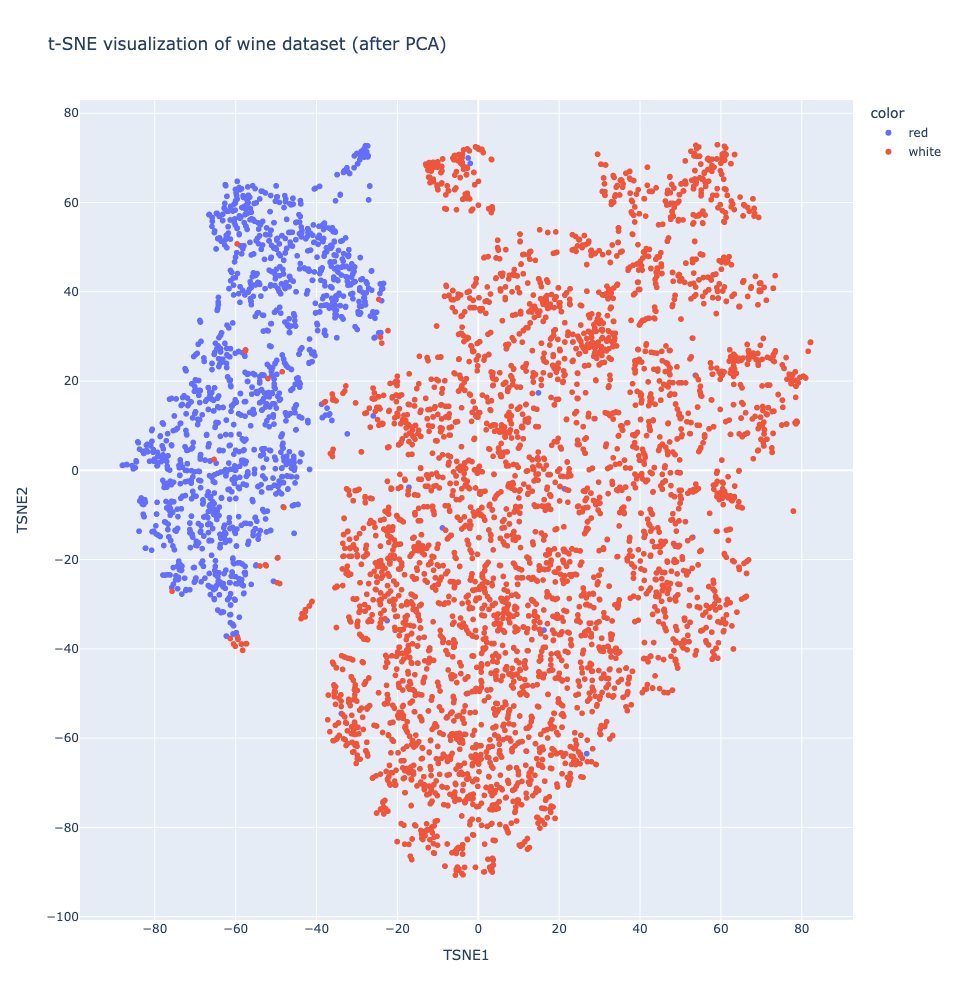

In [35]:
# Creating a DataFrame with t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['color'] = wine_df['color']

# Helper function to plot t-SNE results
def plot_tsne(color='color'):
    fig = px.scatter(tsne_df, x='TSNE1', y='TSNE2', color=color, 
                     title="t-SNE visualization of wine dataset (after PCA)")
    fig.update_layout(autosize=False, width=1000, height=1000)
    fig.show()

# Plotting t-SNE results
plot_tsne()

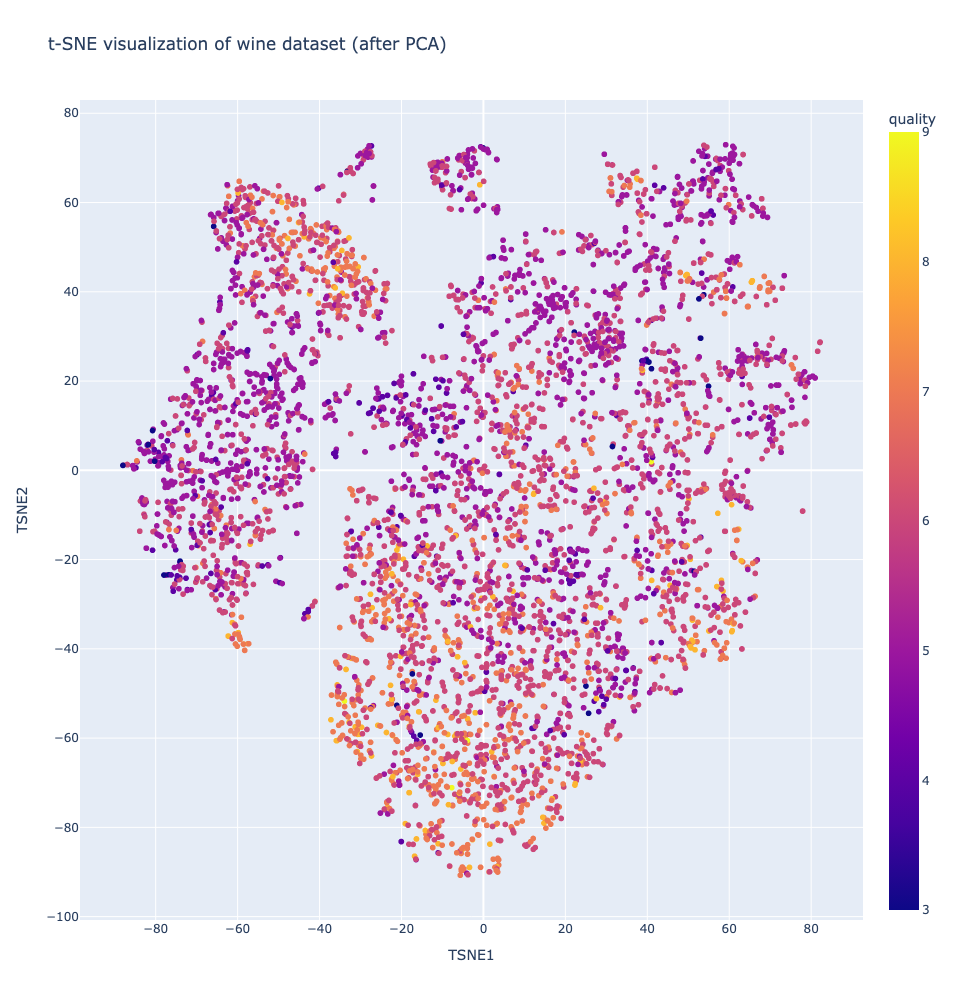

In [36]:
import pandas as pd
import plotly.express as px

# Creating a DataFrame with t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['quality'] = wine_df['quality']

# Helper function to plot t-SNE results
def plot_tsne():
    fig = px.scatter(tsne_df, x='TSNE1', y='TSNE2', color='quality', 
                     title="t-SNE visualization of wine dataset (after PCA)")
    fig.update_layout(autosize=False, width=1000, height=1000)
    fig.show()

# Plotting t-SNE results
plot_tsne()

# K-Means Clustering

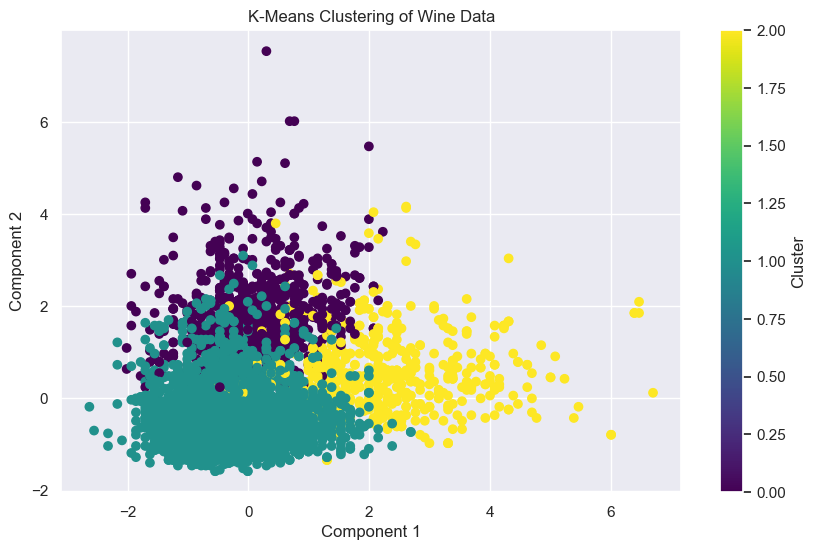

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0       7.294903          0.606983     0.142406        2.437105   0.079129   
1       6.849897          0.274167     0.335453        6.402788   0.045111   
2       9.728826          0.421352     0.454473        2.920059   0.100973   

   free.sulfur.dioxide  total.sulfur.dioxide   density        pH  sulphates  \
0            16.335882             50.402650  0.996088  3.378216   0.598206   
1            35.566694            138.560500  0.994007  3.187508   0.488831   
2            14.930163             46.803863  0.997629  3.208722   0.739079   

     alcohol   cluster  
0  10.304417  0.007136  
1  10.522059  1.000000  
2  10.547202  0.005944

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Drop 'quality' column as specified and keep the rest of the chemical properties
X = wine_df.drop(columns=['quality', 'color'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set the target variable 'color'
y = wine_df['color']

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster assignments to the original dataframe
wine_df['cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=wine_df['cluster'], cmap='viridis', label='Cluster')
plt.title('K-Means Clustering of Wine Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Display the cluster centroids
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
centroids

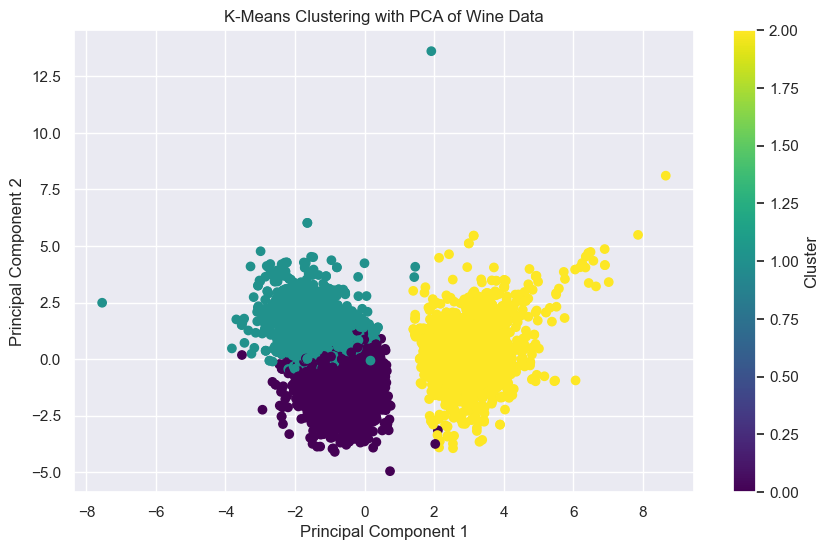

Explained variance by each principal component: [0.31879903 0.21091024 0.13029045 0.08089313 0.06012861 0.05116271
 0.04459813 0.04184095 0.02878934 0.02074804 0.00974359]


In [78]:
# Step 1: Standardize the data
scaler_2 = StandardScaler()
X_scaled_2 = scaler_2.fit_transform(X)

# Step 2: Apply PCA
pca = PCA(n_components=11)  # Reducing to 2 components for visualization
X_pca = pca.fit_transform(X_scaled_2)

# Step 3: Perform K-Means clustering using the principal components
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(X_pca)

# Step 4: Plot the clusters using the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pca.labels_, cmap='viridis')
plt.title('K-Means Clustering with PCA of Wine Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# If you want to add the cluster labels to the original dataframe:
wine_df['cluster_pca'] = kmeans_pca.labels_

# To display the explained variance by each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each principal component:", explained_variance)

In [5]:
# Step 1: Standardize the data
scaler_2 = StandardScaler()
X_scaled_2 = scaler_2.fit_transform(X)

# Step 2: Apply PCA
pca = PCA(n_components=7)  # Reducing to 2 components for visualization
X_pca = pca.fit_transform(X_scaled_2)

# Step 3: Perform K-Means clustering using the principal components
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(X_pca)

# Step 4: Plot the clusters using the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pca.labels_, cmap='viridis')
plt.title('K-Means Clustering with PCA of Wine Data with 7 n_componenets')
plt.show()

# If you want to add the cluster labels to the original dataframe:
wine_df['cluster_pca'] = kmeans_pca.labels_

# To display the explained variance by each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each principal component:", explained_variance)

NameError: name 'X' is not defined

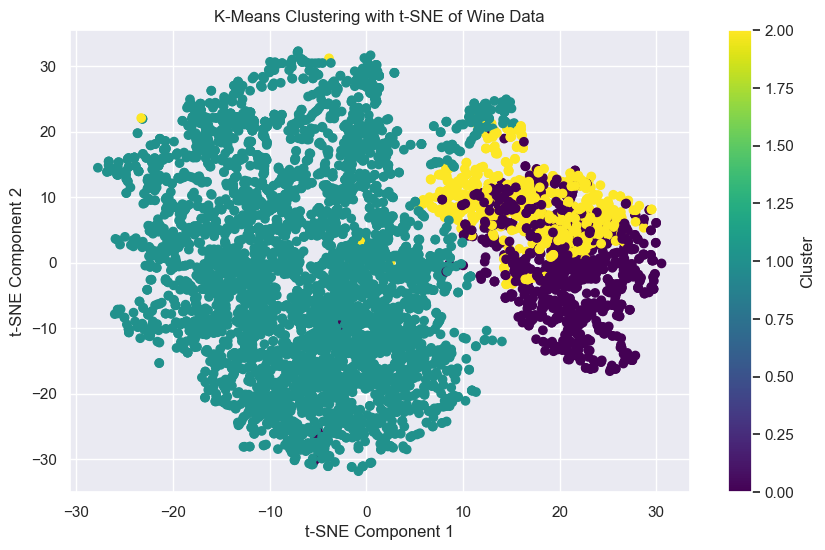

In [82]:
# Step 2: Perform K-Means clustering
#kmeans = KMeans(n_clusters=2, random_state=42)
#kmeans.fit(X_scaled)

# Step 3: Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Step 4: Plot the clusters using t-SNE components
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-Means Clustering with t-SNE of Wine Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Optionally, add the cluster labels to the original dataframe
wine_df['cluster_tsne'] = kmeans.labels_

# PERPLEXITY

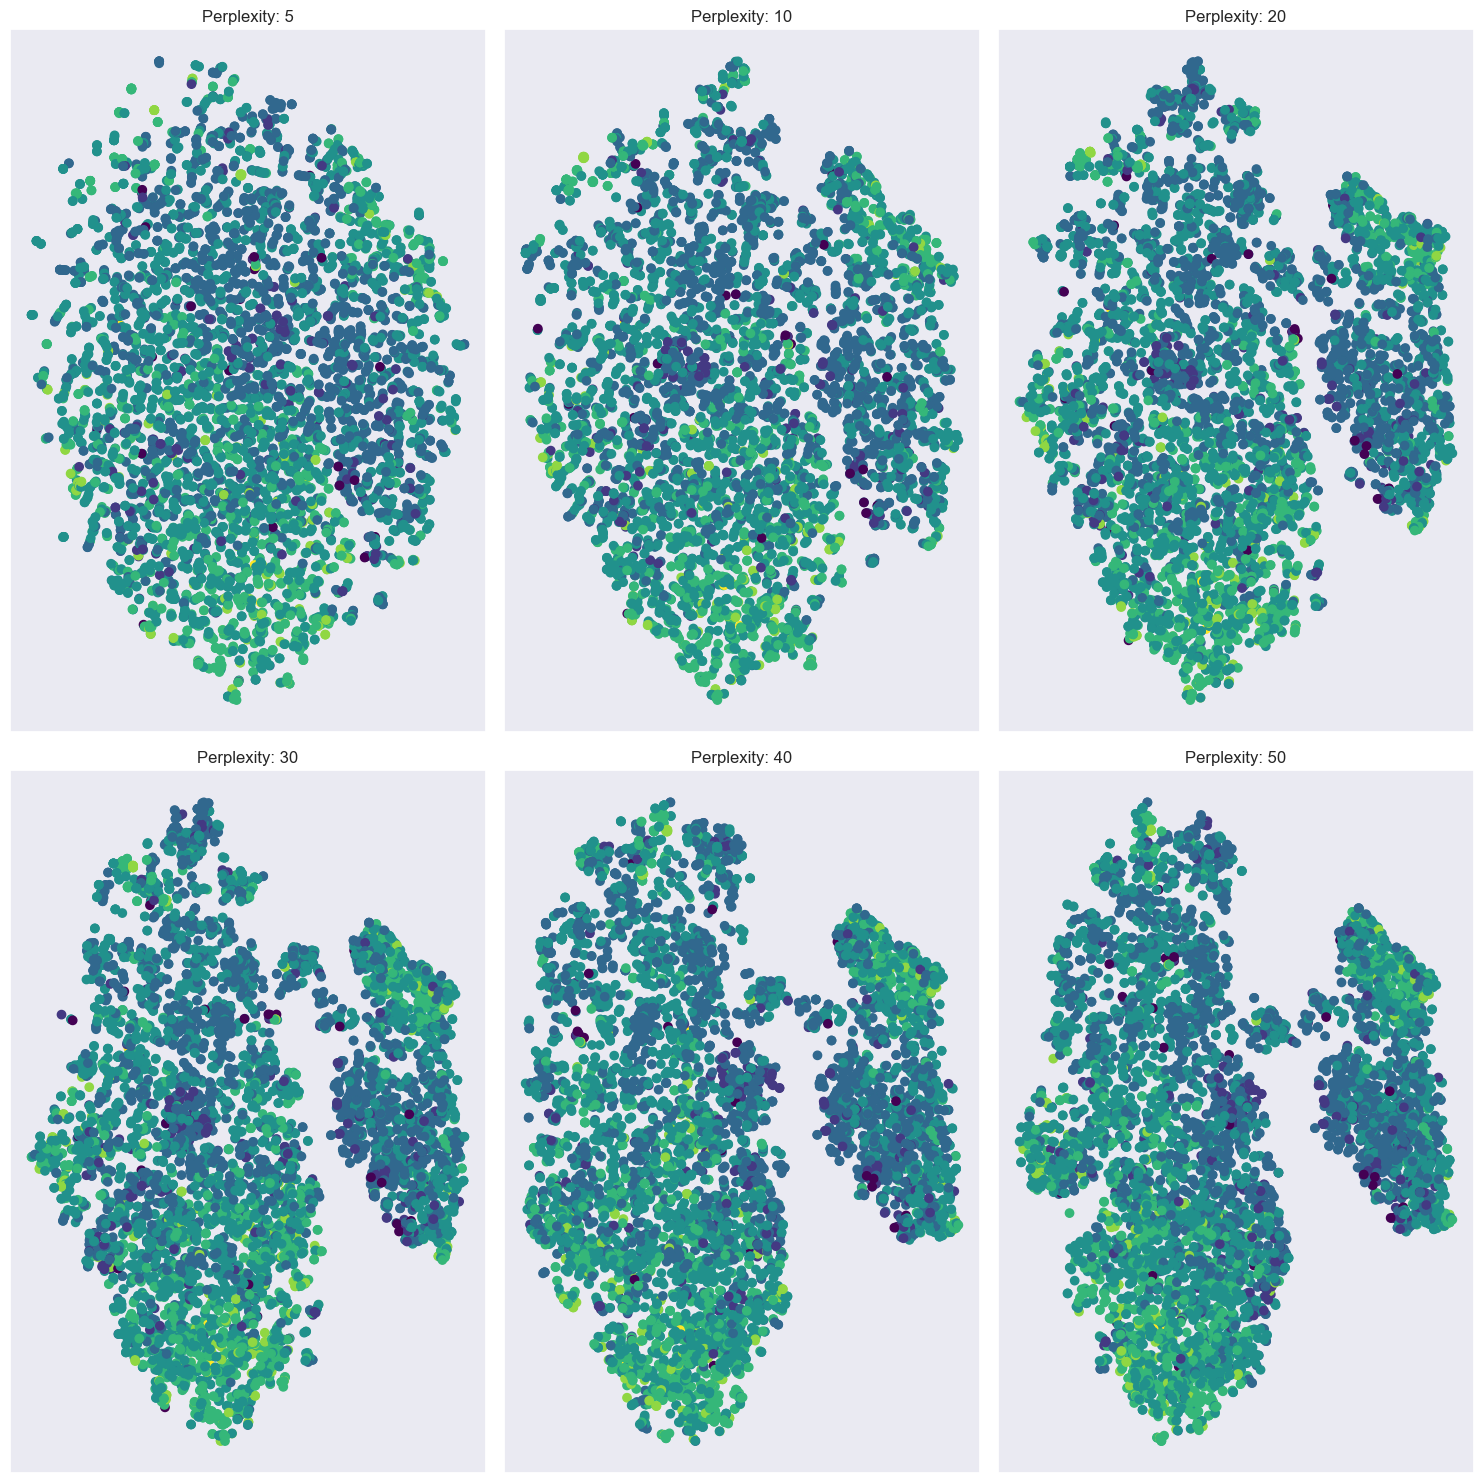

In [85]:
# Varying the perplexity parameter
# define perplexity values to use
perplexities = [ 5, 10, 20, 30, 40, 50]
# create a 3x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15,15))
# reshape axs to 1D array
axs = axs.flatten()
for i, perplexity in enumerate(perplexities):
    # run t-SNE with the specified perplexity
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=1000, learning_rate=200)
    tsne_results = tsne.fit_transform(X_scaled)
    # convert the t-SNE results to a pandas DataFrame
    tsne_df = pd.DataFrame(data = tsne_results, columns = ['Dim1', 'Dim2'])
    # add the categories to this DataFrame
    tsne_df['Category'] = wine_df['quality'].values
    # create a scatter plot in the corresponding subplot
    scatter = axs[i].scatter(tsne_df['Dim1'], tsne_df['Dim2'], c=tsne_df['Category'], cmap='viridis')
    axs[i].set_title(f'Perplexity: {perplexity}')
    axs[i].set_xticks([])
    axs[i].set_yticks([])
# show the plot
plt.tight_layout()
plt.show()


The Perplexity clusters ranges from 5-50, showing how the distribution of the data points for quality of the wine, varies as the parameter of perplexity changes. 
Perplexity 5 - 10: There is very little seperation among the clusters, and the plot is quite dense. It looks like lower perplexity values often focuses more on the local structures, which can lead to tighter cluster plots without a clear seperation.
Perplexity 20: The seperation is a little more visible, though the clusters are still closer together. However, it slightly more balanced and it captures both the local and global structures.
Perplexity 30-50: With higher perplexity values, more distinct clusters with better seperations between them are shown. It looks like higher perplexity values tend to capture more global relationships in the data, potentially revealing more general patterns. 


In [87]:
import pandas as pd

# Crosstab between clusters and wine color
color_cluster_crosstab = pd.crosstab(wine_df['color'], wine_df['cluster_pca'], margins=True)
print("Crosstab between Wine Color and Clusters:")
print(color_cluster_crosstab)

# Crosstab between clusters and wine quality
quality_cluster_crosstab = pd.crosstab(wine_df['quality'], wine_df['cluster_pca'], margins=True)
print("\nCrosstab between Wine Quality and Clusters:")
print(quality_cluster_crosstab)

Crosstab between Wine Color and Clusters:
cluster_pca     0     1     2   All
color                              
red            21     5  1573  1599
white        2940  1894    64  4898
All          2961  1899  1637  6497

Crosstab between Wine Quality and Clusters:
cluster_pca     0     1     2   All
quality                            
3               7    11    12    30
4              97    46    73   216
5             630   808   700  2138
6            1354   845   637  2836
7             723   158   198  1079
8             146    30    17   193
9               4     1     0     5
All          2961  1899  1637  6497


# CONCLUSION


Explained Variance Ratio (PCA Table): From the PCA table, it looks like the first two components itself explains over 50% of the total variance. This shows that, using just the two of the componenets would capture most the important information in the dataset. 

PCA Analysis of Wine DataSet of the Color of the Wine: The scatter plot was created using the first two components, as per the explained variance table. Per the scatter, it shows a good seperation between the two colors of wine that are present. This shows that the PCA analysis is effective in differentiating the two different categories of the wine color. 

PCA Analysis of Wine Dataset of the Quality of Wine: The scatter plot does not show any good seperation between the different quality levels, which can show that PCA analysis may not be as effective, as it was in doing the analysis for the wine color. 

tSNE Plot (Wine Color): This visualization plot, again shows a clear seperation between the red and white wines. This plot captures the complex data, and shows how the data points are related to each other in a reduced space

tSNE Plot (Quality): This plot, does seem to be a better representation of showing the sepeartion in the quality value of wine, even though they are not necessarily grouped together. The higher quality of wine of approx. 8 and upwards, seem to have spread around, showing the quality differences are captured in a few places. 

K-Means Clustering (Unsupervised Learning): Clustering with PCA Componenets, seems to form more distinct groups and shows a good seperation between the groups, which shows that the componenets have effectively captured the variance in the data. The cluster that we did get through tSNE, do seem to overlap.

Overall:

The clusters that are found after applying PCA analysis seem more better, and makes PCA a more effective pre-processing step for K-Means clustering in this case. 
It can be seen that using a higher perplexity values (Perplexity 30-50) in tSNE helps in revealing more clear clusters within the wine datset, showing a better understanding of how the wine quality levels are distributed. 




1. Which dimensionality reduction technique makes the most sense to you for this data?

The dimensionality reduction technique that makes the most sense for this wine dataset is PCA. It effectively reduces the complexity of the data, by getting a really good explained variance in a smaller number of principal componenets. From the above table, with explained variance values, the first two principal variance, showed an approximate 50% of the variance in the data. 

2. Is the chosen approach easily capable of distinguishing the reds from the whites, using only the "unsupervised" information contained in the data on chemical properties?

PCA does show a clear capability to seperate the red and white wines, using the 11 chemical properties. The scatterplot of the PCA componeents shows a distinct seperation between the two colors, with very little overlap. When PCA-reduced data was used for K-Means clustering for Unsupervided leanring, the clusters correlated strongly with wine color. For example, one cluster was almost entirely composed of red wines, while others were predominantly white. This reinforces that PCA effectively captures the differences between red and white wines

3. Does your unsupervised technique also seem capable of distinguishing the higher from the lower quality wines?
   
While PCA is effective and capable in distinguishing red from white wines, it is less effective at distinguishing higher from lower quality wines. The PCA plots with the quality labels shows a lot of overlap between the different quality levels. The K-Means clustering results based on PCA components of the wine quality showed that wines were spread across multiple clusters, with very little to no clear separation by quality. This suggests that while PCA captures the main variation in the data related to the wine color, it does not capture the more subtle variations that differentiate wine quality. For wine quality disctinction, tSNE seems like a better method, as it helps in capturing complex patterns in the dataset, which makes it more suitable for distinguishing between higher and lower quality wines, providing a clearer and more meaningful separation. 
